In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

In [4]:
print(data.head())

       eeg_id  eeg_sub_id  eeg_label_offset_seconds  spectrogram_id  \
0  1628180742           0                       0.0          353733   
1  1628180742           1                       6.0          353733   
2  1628180742           2                       8.0          353733   
3  1628180742           3                      18.0          353733   
4  1628180742           4                      24.0          353733   

   spectrogram_sub_id  spectrogram_label_offset_seconds    label_id  \
0                   0                               0.0   127492639   
1                   1                               6.0  3887563113   
2                   2                               8.0  1142670488   
3                   3                              18.0  2718991173   
4                   4                              24.0  3080632009   

   patient_id expert_consensus  seizure_vote  lpd_vote  gpd_vote  lrda_vote  \
0       42516          Seizure             3         0         0   

In [5]:
print(data.dtypes)

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                     object
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object


In [6]:
# Convert 'expert_consensus' to a categorical type
data['expert_consensus'] = data['expert_consensus'].astype('category')

# Assign encoded variable back to data['expert_consensus']
data['expert_consensus'] = data['expert_consensus'].cat.codes

In [7]:
data['expert_consensus'] = data['expert_consensus'].astype('int64')
print(data.dtypes)

eeg_id                                int64
eeg_sub_id                            int64
eeg_label_offset_seconds            float64
spectrogram_id                        int64
spectrogram_sub_id                    int64
spectrogram_label_offset_seconds    float64
label_id                              int64
patient_id                            int64
expert_consensus                      int64
seizure_vote                          int64
lpd_vote                              int64
gpd_vote                              int64
lrda_vote                             int64
grda_vote                             int64
other_vote                            int64
dtype: object


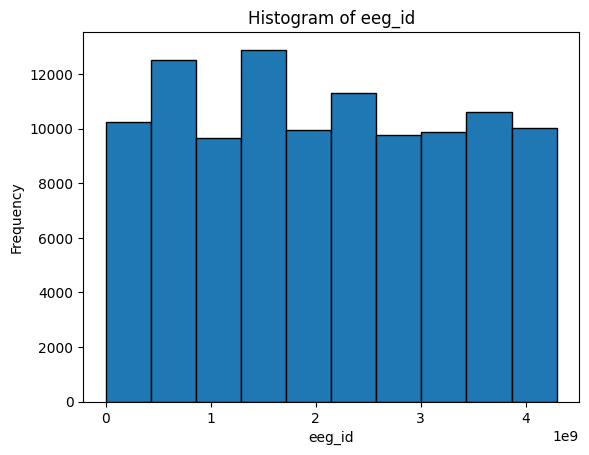

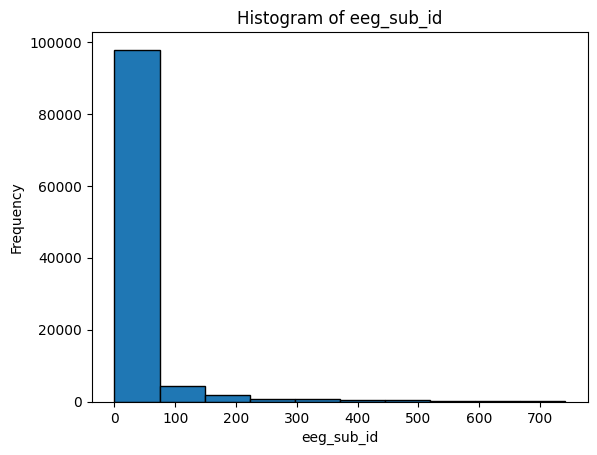

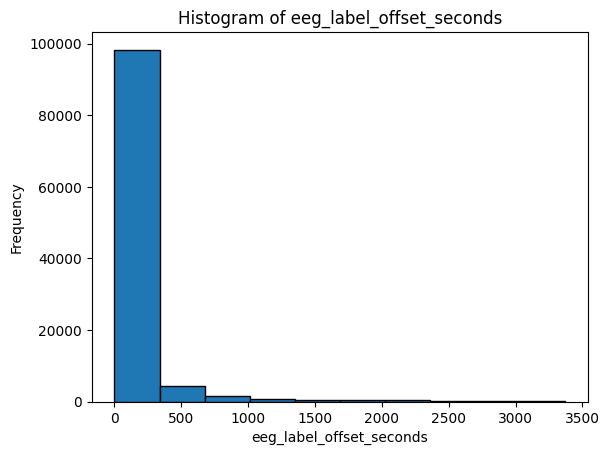

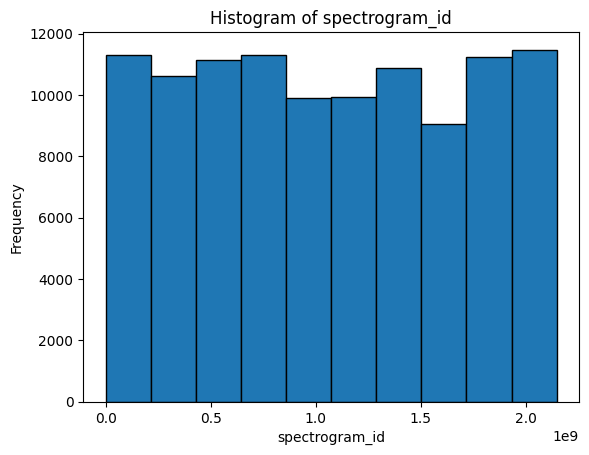

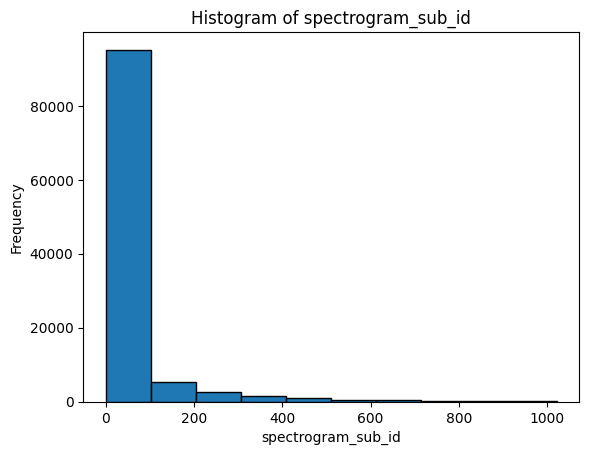

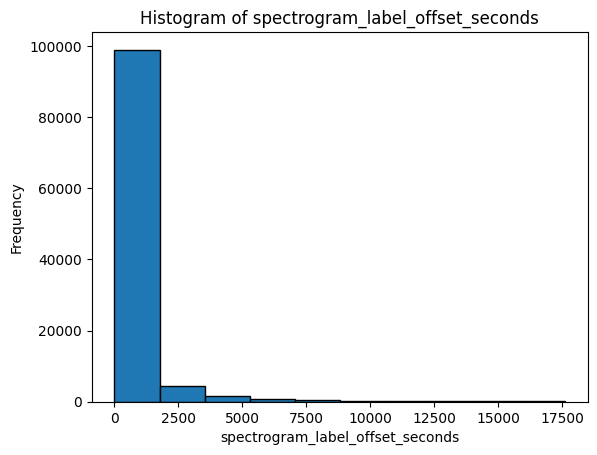

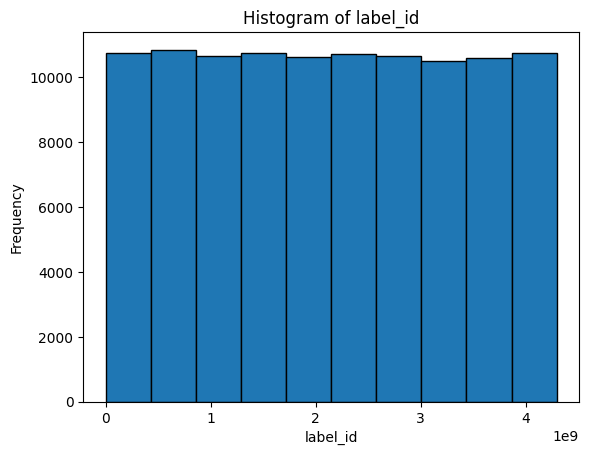

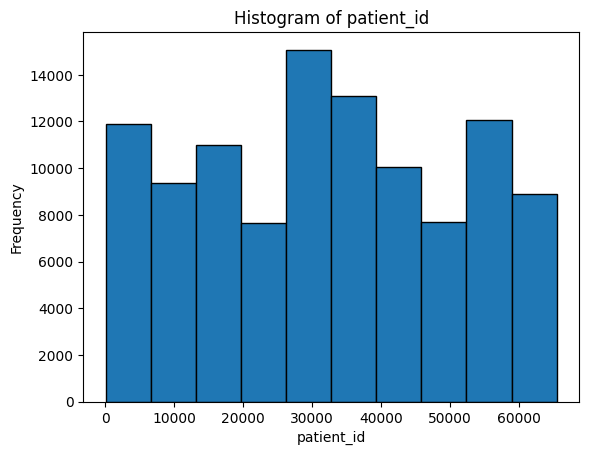

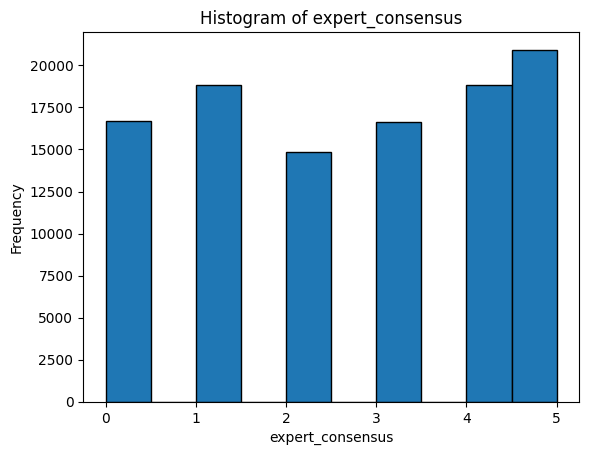

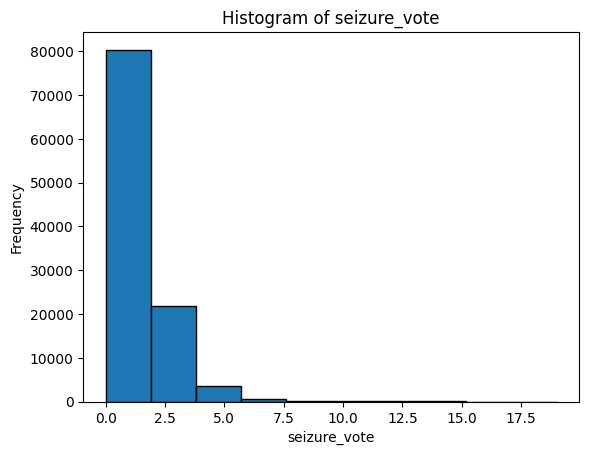

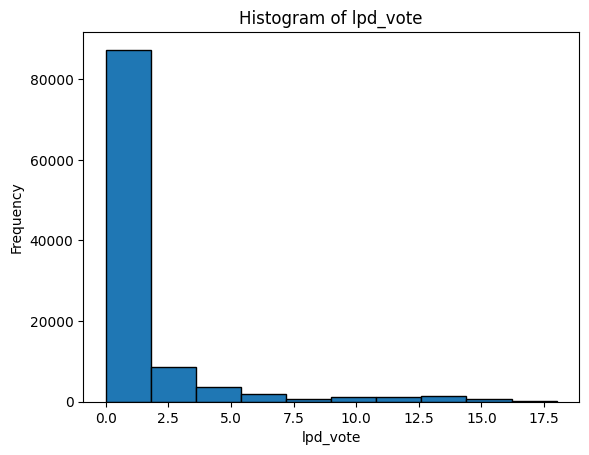

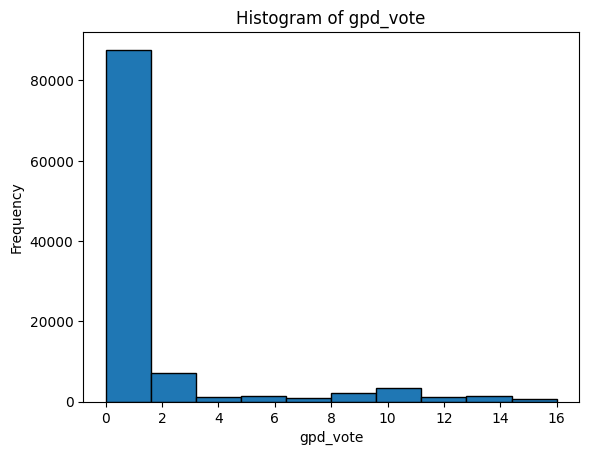

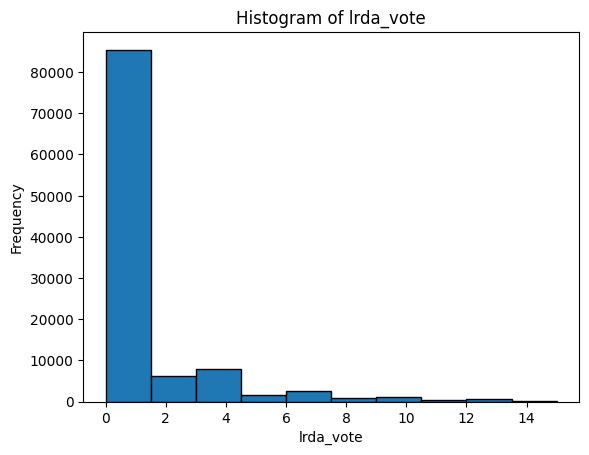

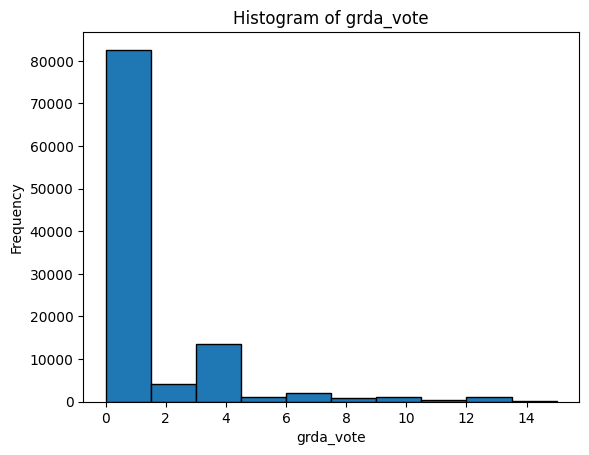

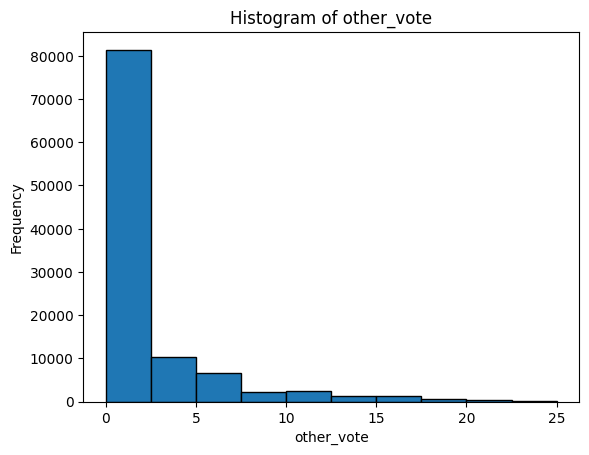

In [8]:
# Loop through all columns in the DataFrame
for column in data.columns:
    # Check if the column is of a numerical data type
    if data[column].dtype in ['int64', 'float64']:
        # Create a histogram for the column
        plt.hist(data[column], bins=10, edgecolor='black')
        
        # Add a title and labels
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
        # Show the plot
        plt.show()

In [9]:
X = data.drop('expert_consensus', axis=1)
y = data['expert_consensus']

In [10]:
# Encode the labels
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (85440, 14)
y_train shape: (85440,)
X_test shape: (21360, 14)
y_test shape: (21360,)


In [13]:
# Convert DataFrame to NumPy array
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# Reshape data for Random Forest and XGBoost
X_train_rf = X_train_np.reshape((X_train_np.shape[0], -1))
X_test_rf = X_test_np.reshape((X_test_np.shape[0], -1))

In [14]:
# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf, y_train)
y_test_pred_rf = rf_model.predict(X_test_rf)

In [15]:
# Create XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train_rf, y_train)
y_test_pred_xgb = xgb_model.predict(X_test_rf)

In [16]:
# Ensemble model using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', rf_model),
    ('xgboost', xgb_model)
], voting='soft')  # 'soft' for probability voting

# Fit the ensemble model
ensemble_model.fit(X_train_np, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(random_state=42)),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))],
                 voting='soft')

In [17]:
import joblib
# Save the model
joblib.dump(ensemble_model, 'ensemble_model.joblib')

['ensemble_model.joblib']

In [18]:
# Load the model
loaded_model = joblib.load('ensemble_model.joblib')

# Predicting the Test set results
y_pred = loaded_model.predict(X_test_np)

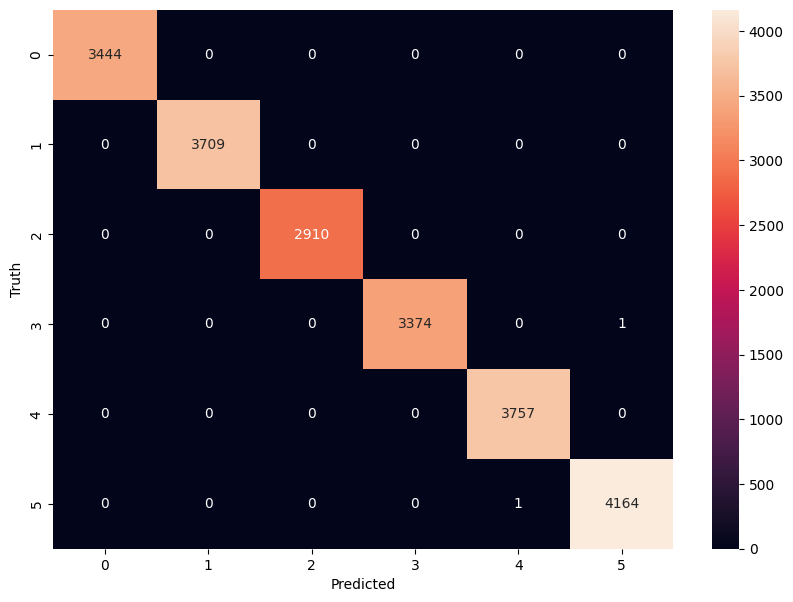

In [19]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [20]:
# Test Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.9999063670411985


In [21]:
# Predict the classes
y_pred_classes = y_pred  # No need for np.argmax in this case

# Select 10 random indices
random_indices = np.random.choice(range(len(y_test)), 10)

# Map the class indices to the actual class labels
class_labels = {i: label for i, label in enumerate(encoder.classes_)}

# Check actual class and predicted class for the randomly selected instances
for i in random_indices:
    actual_class = class_labels[y_test[i]]
    predicted_class = class_labels[y_pred_classes[i]]
    print(f"Instance {i+1}: Actual Class - {actual_class}, Predicted Class - {predicted_class}")

Instance 17752: Actual Class - 3, Predicted Class - 3
Instance 3227: Actual Class - 5, Predicted Class - 5
Instance 10482: Actual Class - 4, Predicted Class - 4
Instance 1528: Actual Class - 0, Predicted Class - 0
Instance 14673: Actual Class - 2, Predicted Class - 2
Instance 14901: Actual Class - 2, Predicted Class - 2
Instance 4139: Actual Class - 3, Predicted Class - 3
Instance 12062: Actual Class - 5, Predicted Class - 5
Instance 12774: Actual Class - 0, Predicted Class - 0
Instance 19924: Actual Class - 5, Predicted Class - 5
